In [4]:
import sys
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import os
import base64
from collections import deque
from collections import namedtuple
import pickle 

display
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import logging

# gym
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

# Local .py files
from visualization import *
from DQN import *
from DQN_utils import *
from DQN_agent import *
from HDQN import *
from HDQN_2head import *
from HDQN_agent import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on", device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on cpu


In [22]:
CHECKPOINT_FOLDERNAME = "checkpoints/"
LEARNING_RATE = 2.5e-6

Populating replay buffer...
Populating replay buffer for meta controller
Beginning training...
Episode 11 Mean Rewards 610.00		
Episode limit reached.


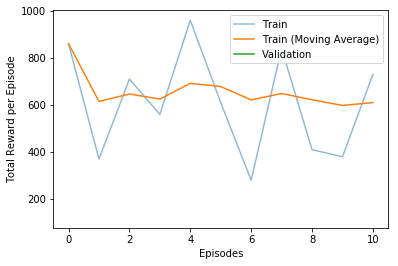

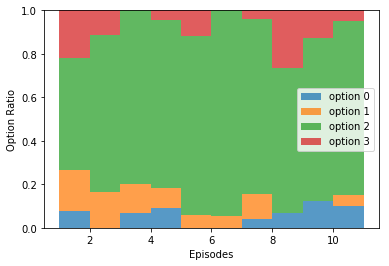

max meta reward: 0.56


In [27]:
PREFIX = "hdqn_2head" # "hdqn"
env = gym.make("MsPacman-v0")
D = experienceReplayBuffer(memory_size=1e2)
hdqn = HDQN_2head(
    env,
    learning_rate=LEARNING_RATE,
    device=device,
    checkpoint_path=CHECKPOINT_FOLDERNAME
)
agent = HDQN_agent(env, hdqn, D, epsilon=0.25)
agent.train(max_episodes=11, network_evaluate_frequency=100, n_val_episodes=1,
            network_save_frequency=10, checkpoint_path=CHECKPOINT_FOLDERNAME, checkpoint_prefix=PREFIX)